# Typical Parameters for Neural Network in Classification

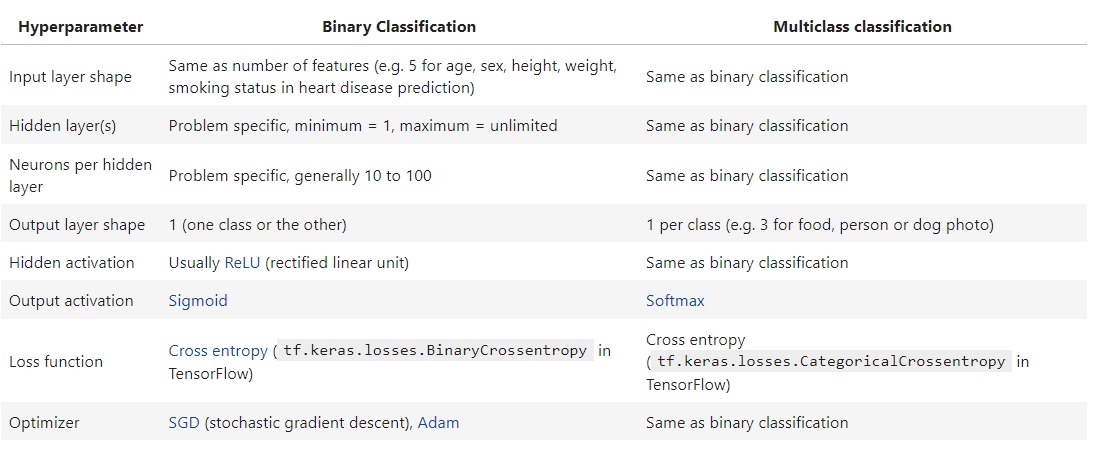

#**Linear vs. Non-Linear Activation Functions**

**Linear Activation Functions**

Think of a linear activation function as a simple line equation, f equals x. This function maps the input directly to the output without changing its shape. If you plot it, it looks like a straight line.

Why is this a problem? If all the layers in a neural network used a linear function, the network could only learn relationships that are linear, or straight-line relationships. No matter how many layers we stack, the output will still behave like a simple line equation, making it unable to solve complex problems that require understanding curves or intricate patterns in the data.

**Non-Linear Activation Functions**

In contrast, non-linear activation functions introduce curves and bends into the network's behavior. These functions allow the network to learn complex patterns and make decisions based on data that aren't just linear.

**Why is this important?**

By using non-linear functions, the network can "stack" multiple layers in such a way that each layer learns different levels of abstraction. For example, in image recognition, the first layer might learn to recognize edges, while deeper layers recognize shapes and, eventually, entire objects.

## Evaluating and improving our classification model

In [ ]:
# Step 1: Split the data into training and testing sets
# Using the first 80% of the data for training (800 examples) and the remaining 20% for testing (200 examples)
X_train, y_train = X[:800], y[:800]  # Training set: features and target labels for 800 samples
X_test, y_test = X[800:], y[800:]   # Test set: features and target labels for the remaining 200 samples

# Step 2: Check the shapes of the training and testing data
# Confirming that the training set has 800 examples and the test set has 200 examples
X_train.shape, X_test.shape

In [ ]:
# Step 1: Set a random seed for reproducibility
# This ensures the results are consistent each time the code runs
tf.random.set_seed(42)

# Step 2: Create the neural network model
model_8 = tf.keras.Sequential([
  # Add the first hidden layer with 4 units and "relu" activation function
  tf.keras.layers.Dense(4, activation="relu"), # relu helps learn non-linear patterns

  # Add the second hidden layer with 4 units and "relu" activation function
  tf.keras.layers.Dense(4, activation="relu"), # same activation function to maintain non-linearity

  # Add the output layer with 1 unit and "sigmoid" activation function
  tf.keras.layers.Dense(1, activation="sigmoid") # sigmoid is used for binary classification to output a probability
])

# Step 3: Compile the model
# Define the loss function for binary classification, optimizer, and evaluation metric
model_8.compile(
    loss=tf.keras.losses.binary_crossentropy, # Binary crossentropy measures the difference between true and predicted labels
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Adam optimizer with an increased learning rate for faster convergence
    metrics=['accuracy'] # Track accuracy during training and testing
)

# Step 4: Fit (train) the model
# Train the model using the training data for 25 epochs
history = model_8.fit(X_train, y_train, epochs=25)

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.



In [ ]:
# Step 1: Evaluate the model on the test set
# This calculates the loss and accuracy of the model using the test data
loss, accuracy = model_8.evaluate(X_test, y_test)

# Step 2: Print the evaluation results
# Display the loss and accuracy to understand the model's performance on unseen data
print(f"Model loss on the test set: {loss}")                  # Output the loss value
print(f"Model accuracy on the test set: {100*accuracy:.2f}%") # Output the accuracy as a percentage

## Plot the loss curves


In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

 **Note**: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

 * **The learning_rate** `(also lr) parameter - We increased the learning rate parameter in the Adam optimizer to 0.01 instead of 0.001 (an increase of 10x).` You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a too high learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.

* **The number of epochs** -
One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

## Finding the best learning rate


Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the learning rate.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.



In [ ]:
# Step 1: Set a random seed for reproducibility
# This ensures that the results are consistent each time the code runs
tf.random.set_seed(42)

# Step 2: Create a neural network model (same architecture as model_8)
model_9 = tf.keras.Sequential([
  # Add the first hidden layer with 4 units and "relu" activation function
  tf.keras.layers.Dense(4, activation="relu"),  # relu helps learn non-linear patterns

  # Add the second hidden layer with 4 units and "relu" activation function
  tf.keras.layers.Dense(4, activation="relu"),  # same activation function to maintain non-linearity

  # Add the output layer with 1 unit and "sigmoid" activation function
  tf.keras.layers.Dense(1, activation="sigmoid")  # sigmoid is used for binary classification to output a probability
])

# Step 3: Compile the model
# Define the loss function, optimizer, and evaluation metric
model_9.compile(
    loss="binary_crossentropy",  # Loss function for binary classification (can also use tf.keras.losses.binary_crossentropy)
    optimizer="Adam",  # Optimizer; can use string notation for the default settings
    metrics=["accuracy"]  # Track accuracy during training and testing
)

# Step 4: Create a learning rate scheduler callback
# This callback adjusts the learning rate based on the epoch number
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# This increases the learning rate exponentially starting from 1e-4

# Step 5: Fit (train) the model, passing the lr_scheduler callback
# Train the model using the training data for 100 epochs
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])  # Include the learning rate scheduler in the training process

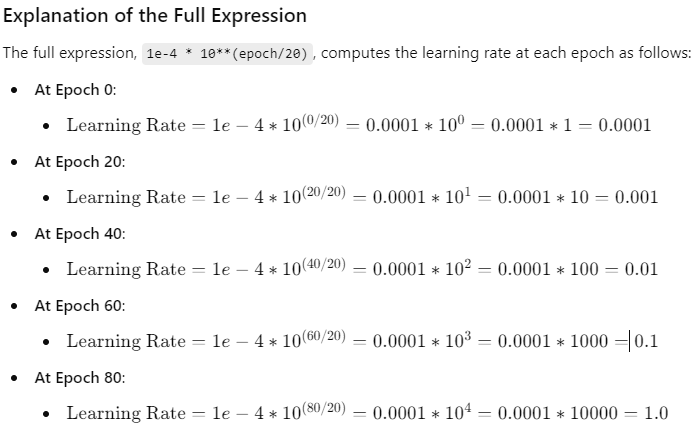

**Note**:

The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

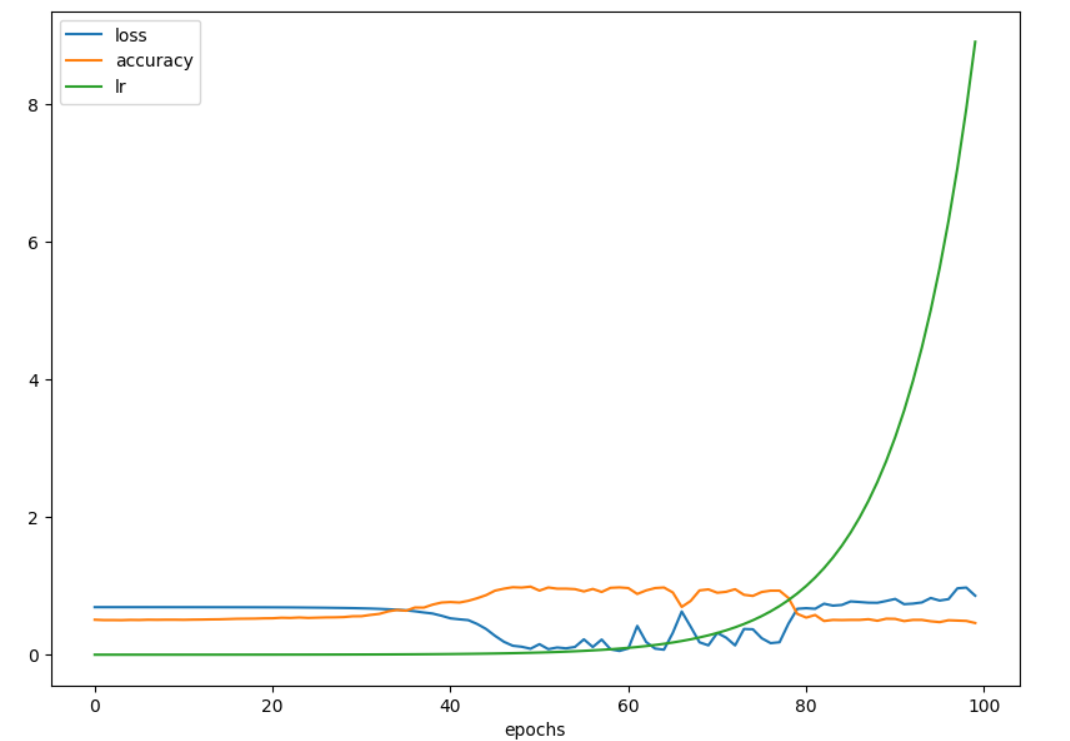

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))  # Create an array of learning rates, starting at 0.0001 and increasing exponentially
plt.figure(figsize=(10, 7))  # Set the figure size to 10x7 inches for better readability
plt.semilogx(lrs, history.history["loss"])  # Plot the learning rate (log scale) vs. loss
plt.xlabel("Learning Rate")  # Label for the x-axis
plt.ylabel("Loss")  # Label for the y-axis
plt.title("Learning rate vs. loss")  # Add a title to the plot

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

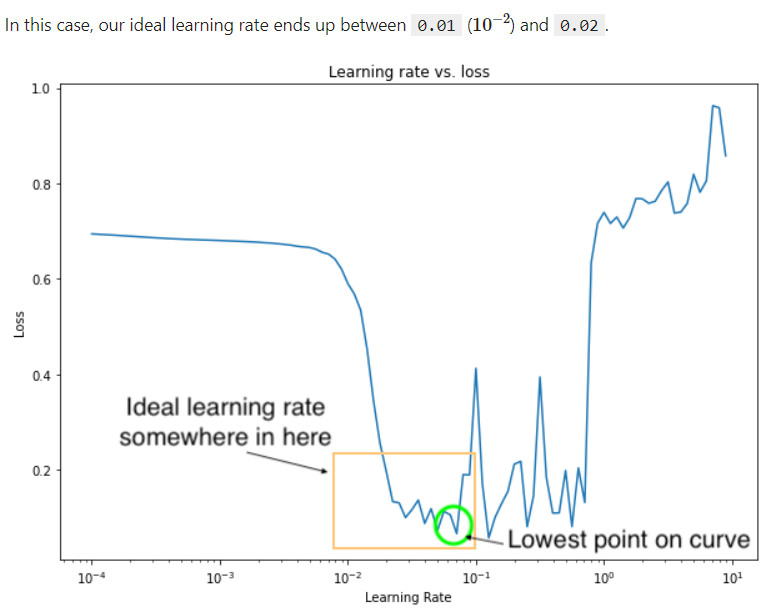

The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).

**What Does It Do?**


**This line plots a graph where:**

lrs (learning rates) is plotted on the x-axis.
history.history["loss"] (loss values recorded during training) is plotted on the y-axis.
The function plt.semilogx() is used, which creates a line plot where the x-axis (learning rate) is represented on a logarithmic scale. This means that instead of increasing linearly (like 1, 2, 3), the x-values increase by factors (like 0.0001, 0.001, 0.01, etc.).

**What Is a Log Scale?**

A logarithmic scale (log scale) is a way of displaying numerical data over a wide range of values by using logarithms. Instead of spacing numbers linearly, they are spaced based on the logarithm of the number. This makes it easier to handle large ranges of values, particularly when the values increase exponentially.

**For example:**

On a linear scale, numbers might be evenly spaced: 1, 2, 3, 4, 5.
On a log scale, the numbers are spaced according to powers of 10: 0.0001, 0.001, 0.01, 0.1, 1.


**Why Use a Log Scale Here?**
* Wide Range of Learning Rates: Since learning rates can vary from very small (e.g., 0.0001) to relatively large (e.g., 1), plotting them on a log scale helps spread out the data for better visibility.
* Identify Patterns: It makes it easier to observe how loss changes across different orders of magnitude in learning rates, helping to identify an optimal range.
* Exponential Growth Visualization: When data grows or shrinks exponentially, a log scale can make the trends more apparent.
In this plot, using a logarithmic scale for the x-axis helps highlight how the loss changes as the learning rate increases exponentially.

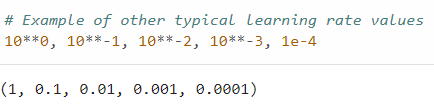

Now we've estimated the ideal learning rate (we'll use 0.02) for our model, let's refit it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

## More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

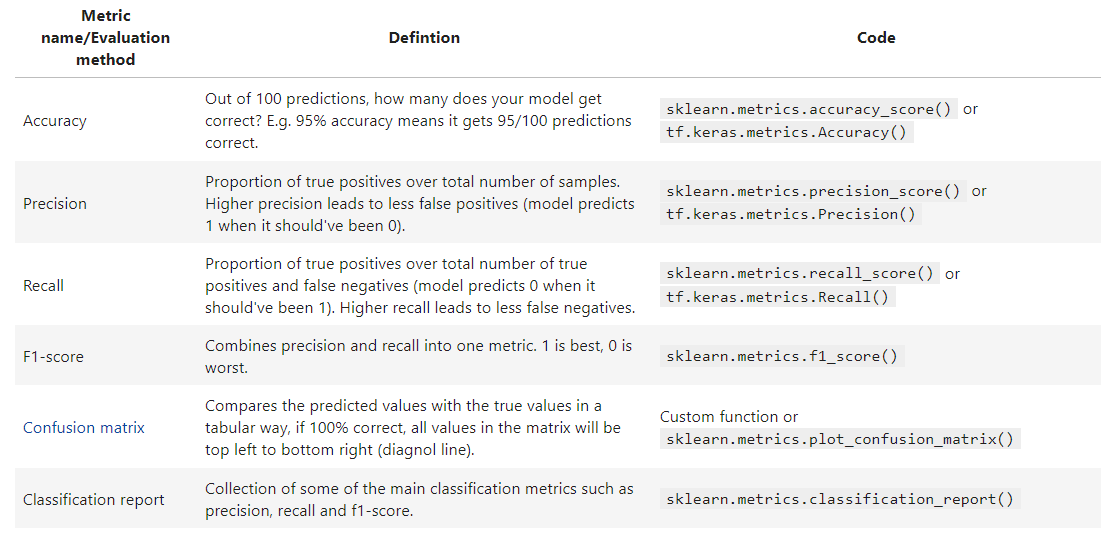

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

### In case you see this error

**ValueError: Classification metrics can't handle a mix of binary and continuous targets**


It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called prediction probabilities.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [ ]:
# View the first 10 predictions
y_preds[:10]

# View the first 10 test labels
y_test[:10]

# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

# Multiclass Classification

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
* We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * `More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().`
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images (28x28) to a 1D array (784)
  tf.keras.layers.Dense(4, activation="relu"),     # First hidden layer with 4 neurons and ReLU activation
  tf.keras.layers.Dense(4, activation="relu"),     # Second hidden layer with 4 neurons and ReLU activation
  tf.keras.layers.Dense(10, activation="softmax")   # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Use sparse categorical crossentropy for multiclass classification
    optimizer=tf.keras.optimizers.Adam(),                   # Adam optimizer (default settings)
    metrics=["accuracy"]                                     # Track accuracy as a metric
)

# Fit the model on the normalized training data
norm_history = model_12.fit(
    train_data,                  # Training data
    train_labels,                # Training labels
    epochs=10,                   # Train for 10 epochs
    validation_data=(test_data, test_labels)  # Use test data for validation during training
)

**Note**

The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Plot each model's history (their loss curves).

In [ ]:
import pandas as pd

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

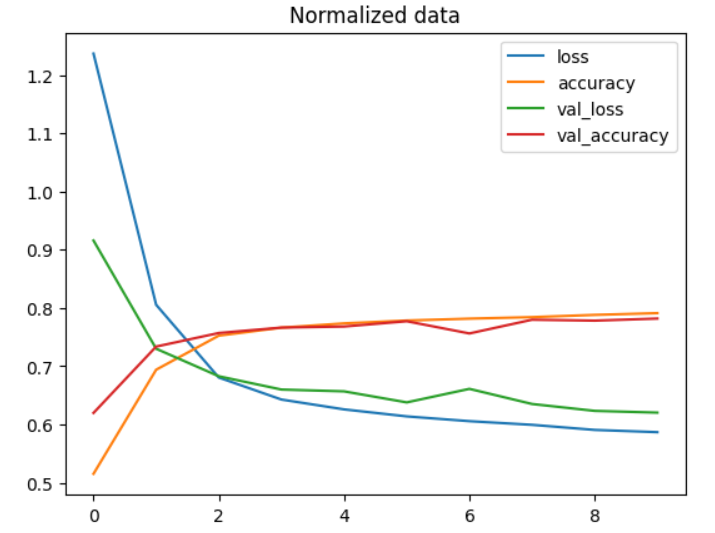

## Finding the best learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

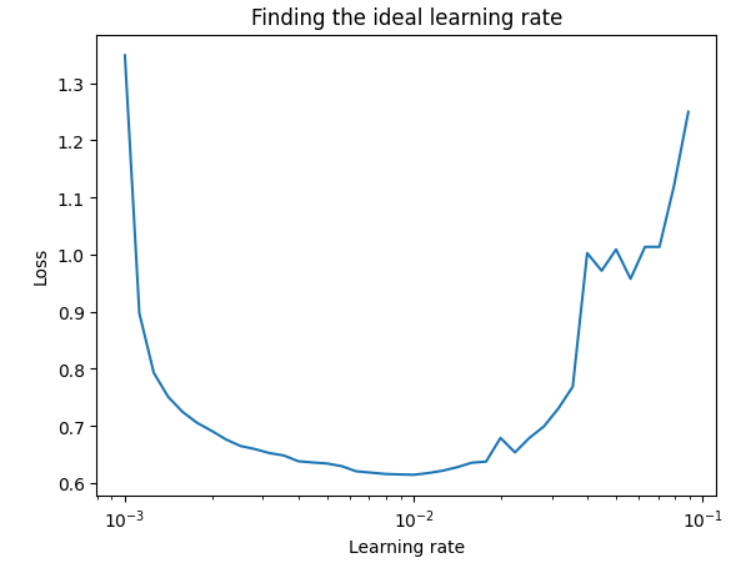

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layer: Flattens 28x28 images into a 1D array of size 784
  tf.keras.layers.Dense(4, activation="relu"),   # First hidden layer: 4 neurons, ReLU activation adds non-linearity
  tf.keras.layers.Dense(4, activation="relu"),   # Second hidden layer: 4 neurons, ReLU activation for non-linear mapping
  tf.keras.layers.Dense(10, activation="softmax") # Output layer: 10 neurons for 10 classes, softmax activation for probabilities
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function for integer-encoded labels
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam optimizer with a learning rate of 0.001
                 metrics=["accuracy"]) # Track accuracy during training and validation

# Train the model on training data and validate on test data
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20, # Train for 20 epochs
                       validation_data=(test_data, test_labels)) # Use test data for validation

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

**We could:**

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
Save and export it for use in an application.

## What patterns is our model learning?

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (model_14) using the layers attribute.

In [ ]:
# Find the layers of our most recent model
model_14.layers

We can access a target layer using indexing.



In [ ]:
# Extract a particular layer
model_14.layers[1]

And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

**Note on weights**:

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

Now let's check out the bias vector.



In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

**Note on bias:**

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
# Can now calculate the number of paramters in our model
model_14.summary()

Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to every layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model()

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

### Prototype model

**For future reference**

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer: Flattens the 28x28 images into a 1D array of size 784.

  # First hidden layer:
  tf.keras.layers.Dense(4, activation="relu",  # Applies ReLU activation function.
                        name="dense_1",  # Unique name for the layer.
                        bias_initializer="zeros",  # Initializes biases to zero (default behavior).
                        kernel_initializer="glorot_uniform"),  # Glorot uniform initializer for weights (default).

  # Second hidden layer:
  tf.keras.layers.Dense(4, activation="relu",  # Applies ReLU activation function.
                        name="dense_2",  # Unique name for the layer (changed for clarity).
                        bias_initializer="zeros",  # Initializes biases to zero (default behavior).
                        kernel_initializer="glorot_uniform"),  # Glorot uniform initializer for weights (default).

  # Output layer:
  tf.keras.layers.Dense(10, activation="softmax",  # Applies softmax for multiclass classification.
                        name="output_layer",  # Unique name for the layer (changed for clarity).
                        bias_initializer="zeros",  # Initializes biases to zero (default behavior).
                        kernel_initializer="glorot_uniform")  # Glorot uniform initializer for weights (default).
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Loss function for multiclass labels in integer format.
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a specified learning rate.
                 metrics=["accuracy"])  # Metric to evaluate model performance during training.

# Fit the model
history = model_14.fit(train_data,  # Training data.
                       train_labels,  # Training labels.
                       epochs=20,  # Number of training epochs.
                       validation_data=(test_data, test_labels))  # Validation data to evaluate performance during training.

### Conclusion

**Weight and biases are continuously adjusted to make the model's predictions more accurate.**

* Weights are adjusted to determine how much influence each input has on the output. If a particular input is important for making the right prediction, its weight will be increased; if it's not important, its weight will be decreased.

* Biases are adjusted to shift the output value. They help the model learn to make predictions even when the input values are small or zero. It's like fine-tuning the starting point of the prediction.

Together, these adjustments are made through a process called backpropagation, where the model calculates the error (difference between the predicted output and the actual output), and then tweaks the weights and biases slightly to reduce that error in the next round. This process repeats over many iterations until the model becomes good at making accurate predictions.